In [1]:
import numpy as np

from helper import State, Simulator

%matplotlib inline

# World description
### Actions
Our world is a grid world. An agent can move the world travelling in four main directions, so four actions are possible:
- 0 (up)
- 1 (right)
- 2 (down)
- 3 (left)

Each action moves us to the corresponding state. If it is impossible to be moved, we are staying in the same state. There is also a terminal state (marked red). Reaching a terminal state ends the episode.

### States
A state is a location of the agent. A standard way to describe the state is by using an instance of a `State` class. Such an object has two properties: `state.row` and `state.col` that are describing the position of the agent. Both rows and cols are counted from `0`, so the upper left corner corresponds to `(0, 0)` state. Another way of describing a state is by using a tuple `(row, col)`. Such a format is also accepted by methods implemented in a simulator.

### Rewards
For each move a negative reward `Reward = -1` is granted. Aditionally, for entering each state a reward associated with this state is granted.



# Simulator Description
A main goals of a simulator are as follows:
- store the data about the world
- store the current policy
- store the current value function
- facilitate RL-related operations

#### Properties:
- `world` - numpy.array with the world. The numbers correspond to the rewards for reaching each state
- `policy` - numpy.array with policy. Policy is always deterministic. The numbers represent specific actions: 0 (up), 1 (right), 2 (down), 3 (left)
- `values` - numpy.array with the state-value function for each state
- `reward` - aditional reward granted for performing each action
- `terminal` - a terminal state. It is an instance of the `State` class. 

#### Methods:
- `move` - Returns a state that is the result of an action.
- `getReward` - Returns the reward for entering a specific state (location).
- `getValue` - Returns a Value function for a determined state (location).
- `getPolicy` - Returns a policy for a determined state (location).
- `setValue` - Sets a Value function for a determined state (location).
- `setPolicy` - Sets a policy for a determined state (location).
- `plot` - Visualizes the world, value function and policy.



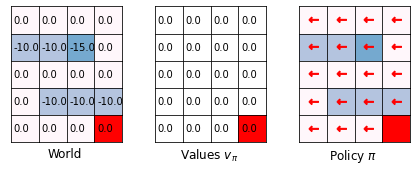

In [2]:
world = np.array([
    [ 0,    0,   0,  0],
    [-10, -10, -15,  0],
    [ 0,   0,   0,   0],
    [ 0, -10, -10, -10],
    [ 0,   0,   0,   0],
])



sim = Simulator(
    world = world, # Our World
    terminal = [x-1 for x in world.shape], # t. state in lower right corner
    reward = -1 # Reward for each step
    )

sim.policy = 3 + sim.world * 0
sim.plot()

#### Reward, Value, Policy
We can communicate with world, reading Rewards, Value functions and 
Let's see how it works

In [3]:
#Let's start with state (location) 1, 2 (row nr 1, column nr 2)

def displayStateData(sim, state):
    print (f'Reward: {sim.getReward(state)}')
    print (f'Value: {sim.getValue(state)}')
    print (f'Policy: {sim.getPolicy(state)}')

displayStateData(sim, (1, 2))

Reward: -16
Value: 0.0
Policy: 3


##### Setting values and policies.

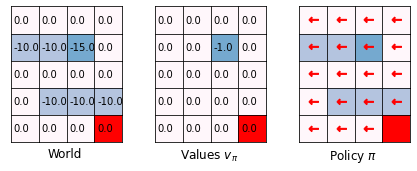

In [4]:
sim.setValue((1, 2), -1)
sim.plot()

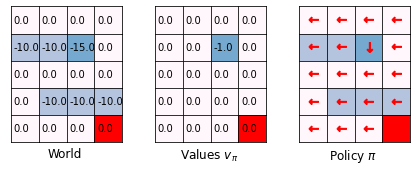

In [5]:
sim.setPolicy((1, 2), 2)
sim.plot()

#### Using `State` class

In [6]:
state = State((1, 2))

print (f'State: {state}')
print (f'Row: {state.row}')
print (f'Col: {state.col}')

State: Row: 1, Col: 2
Row: 1
Col: 2


In [7]:
displayStateData(sim, state)

Reward: -16
Value: -1.0
Policy: 2


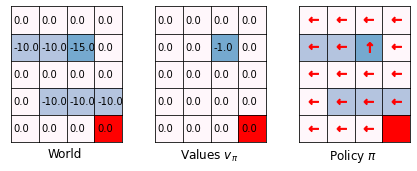

In [8]:
sim.setPolicy(state, 0)
sim.plot()

#### Using `simulator.move()` method
There are two ways of using `simulator.move()` method. In the first version, you provide two arguments:
- `state` - the starting location that you want to move from. It may be either an instance of a `State` class or a tupple with (row, col) coordinates
- `action` - action to be performed. One of: 0 (up), 1 (right), 2 (down), 3 (left)

The method returns a destination state (an instance of the `State()` class)

In [9]:
print (sim.move(state, 1)) # move right from (1, 2) point
print (sim.move((0, 0), 3)) # Move left from (0, 0) point

Row: 1, Col: 3
Row: 0, Col: 0


In the second version you should just provide a starting location (state) that you want to move from. The action is selected from the current policy.

In [10]:
print (sim.move(state)) # move from (1, 2) point, according to the policy (up)
print (sim.move((3, 0))) # Move from (3, 0) point, according to the policy (left)

Row: 0, Col: 2
Row: 3, Col: 0


# TO DO
Create a code that uses one of DP algorithms to find an optimal policy for the given world.
To pass the assignment you have to:
- show that your code works
- understand the code
- understand the theory behind the code
- understand the general idea of dynamic programming.

*Note 1: It is not necessary to use the simulator, but you should at least consider it. It will make your life much easier.*

*Note 2: You may use any discount rate you wish, but I recommend you to discount your rewards (use something < 1, eg. 0.9)*

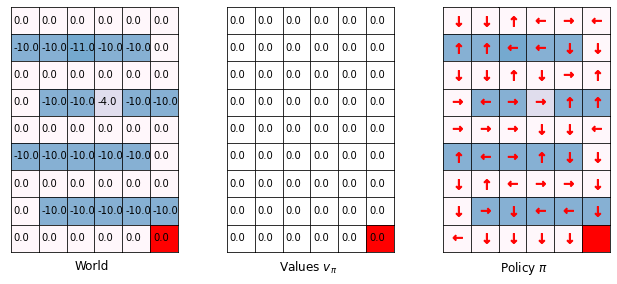

In [22]:
world = -np.array([
    [ 0,  0,  0,  0,  0,  0],
    [10, 10, 11, 10, 10,  0],
    [ 0,  0,  0,  0,  0,  0],
    [ 0, 10, 10,  4, 10, 10],
    [ 0,  0,  0,  0,  0,  0],
    [10, 10, 10, 10, 10,  0],    
    [ 0,  0,  0,  0,  0,  0],
    [ 0, 10, 10, 10, 10, 10],
    [ 0,  0, 0,   0,  0,  0],
])


sim = Simulator(
    world = world, # Our World
    terminal = [x-1 for x in world.shape], # t. state in lower right corner
    reward = -1 # Reward for each step
    )

sim.plot()

In [23]:
sim.terminal.getTuple()

(8, 5)

In [27]:
# params setup
gamma = 0.99
theta = 0.01

In [28]:
while True:
    # Evaluation
    while True:
        delta = 0
        for row in range(sim.world.shape[0]):
            for col in range(sim.world.shape[1]):
                state = State(row,col)
                if state != sim.terminal:
                    v_old = sim.getValue(state)
                    v_new = sim.getReward(sim.move(state)) + gamma * sim.getValue(sim.move(state))
                    sim.setValue(state, v_new)
                    delta = np.max([delta, abs(v_old - v_new)])
        if delta < theta:
            break
    # Iteration
    stable_policy = True
    for row in range(sim.world.shape[0]):
        for col in range(sim.world.shape[1]):
            state = State(row,col)
            if state != sim.terminal:
                old_action = sim.getPolicy(state)
                new_action = np.argmax([
                    sim.getReward(sim.move(state, i)) + gamma * sim.getValue(sim.move(state, i))
                    for i in range(4)
                ])
                sim.setPolicy(state, new_action)
                if old_action != new_action:
                    stable_policy = False
    if stable_policy:
        break

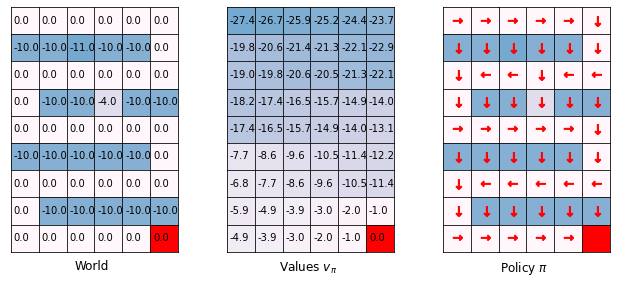

In [29]:
sim.plot()